# **classify wine quality with KNN, SVM, & a DNN**

[wine quality data](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)



![4494514875_6d5c575673_b[1].jpg](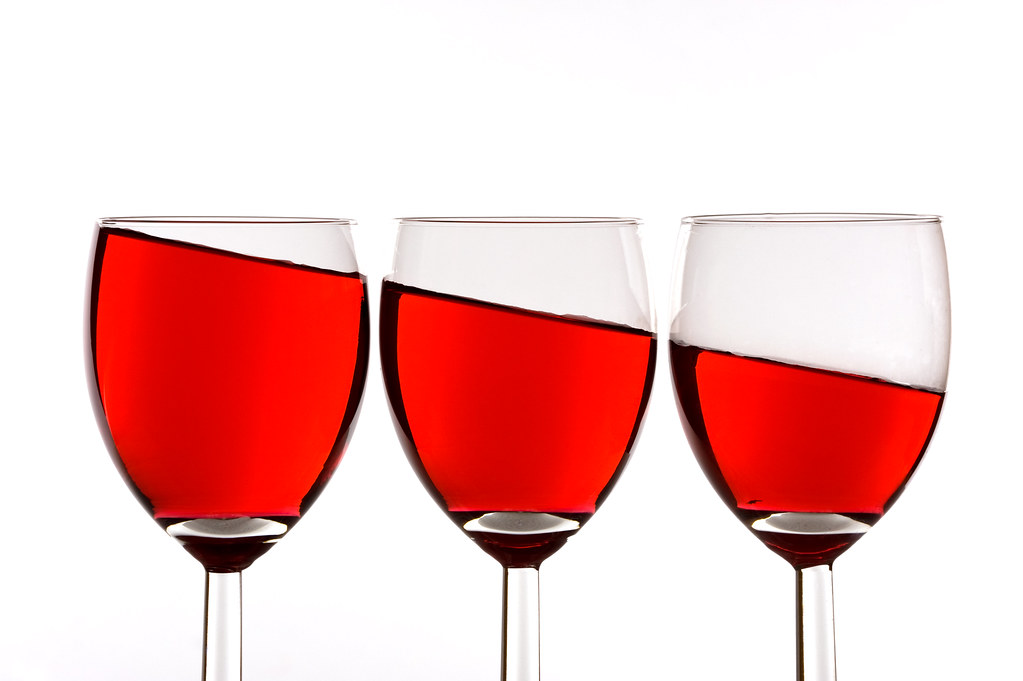)

## Imports

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

sns.set_theme(style="darkgrid")

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## The columns:
<div dir=rtl>

fixed acidity - חומציות קבועה
רוב החומצות שקשורות ליין או קבועות או בלתי נדיפות

###volatile acidity - חומציות נדיפה

כמות חומצה אצטית ביין, שברמות גבוהות מדי עלולה לגרום לטעם חומצי ובלתי נעים

###citric acid - חומצה ציטרית \ חומצת לימון

נמצאת בכמויות קטנות, חומצת לימון יכולה להוסיף "רעננות" וטעם ליינות

###residual sugar - שאריות סוכר

הסוכר הלא מותסס שנשאר ביין. ריכוזו ביין קובע את "יובשו" או מתיקותו. נדיר למצוא יינות עם פחות מ-1 גרם/ליטר ויינות עם יותר מ-45 גרם/ליטר נחשבים מתוקים

###chlorides - כלורידים

כמות המלח ביין

###free sulfur dioxide - גופרית דו חמצנית החופשית ביין

הגופרית בצורתה ה"אקטיבית" ביין. הצורה החופשית של SO2 קיימת בשיווי משקל בין SO2 מולקולרית (כגז מומס) ליון ביסולפיט; הוא מונע צמיחה של חיידקים וחמצון של יין


###total sulfur dioxide - סך גופרית דו חמצנית

כמות הצורות החופשיות והקשורות של S02; בריכוזים נמוכים, SO2 לרוב אינו ניתן לזיהוי ביין, אך בריכוז SO2 חופשי מעל 50 ppm, SO2 מתגלה בריח ובטעם של יין

###density - צפיפות
צפיפות היין קרובה לזו של מים בהתאם לאחוז האלכוהול והסוכר

###pH
.מדד לרמת החומציות של תמיסות. מתאר עד כמה חומצי או בסיסי יין בסולם מ-0 (חומצי מאוד) עד 14 (מאוד בסיסי); רוב היינות הם בין 3-4 בסולם ה-pH

###sulphates - סולפטים

תוסף יין שיכול לתרום לרמות גז גופרית דו חמצני (S02), הפועל כאנטי מיקרוביאלי ונוגד חמצון

###alcohol - אלכוהול

אחוז האלכוהול שביין

###quality - איכות
המשתנה התלוי (איכות היין שמבוססת על נתונים תחושתיים, ציון בין 3 ל-8)
</div dir=auto>

## Display df

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/ML/data/winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [ ]:
df.shape

# ניתן לראות שיש 1599 טורים ו12 שורות במאגר

(1599, 12)

In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<div dir=auto>
מציג את כל המידע (חציון, ממוצע, מינימום, מקסימום, סטיית תקן וכדומה) על כל המשתנים המספריים בבסיס הנתונים

In [ ]:
df.describe().transpose()

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

## Plotting

### Plot the relationship between 2 columns coloured by quality

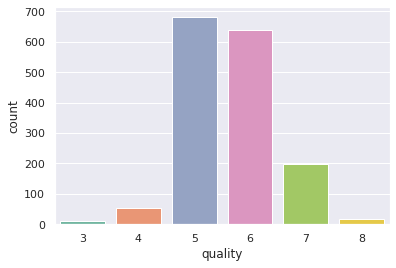

In [ ]:
sns.countplot(x='quality', data=df, palette='Set2');

In [ ]:
print(df['quality'].value_counts())
# ניתן לראות שיש מעט מאוד יינות עם איכות 3 או 8, אז נכניס אותם לקבוצה הכי קרובה, 4 ו7 בהתאמה
df['quality'] = df['quality'].replace(3, 4)
df['quality'] = df['quality'].replace(8, 7)
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


5    681
6    638
7    217
4     63
Name: quality, dtype: int64

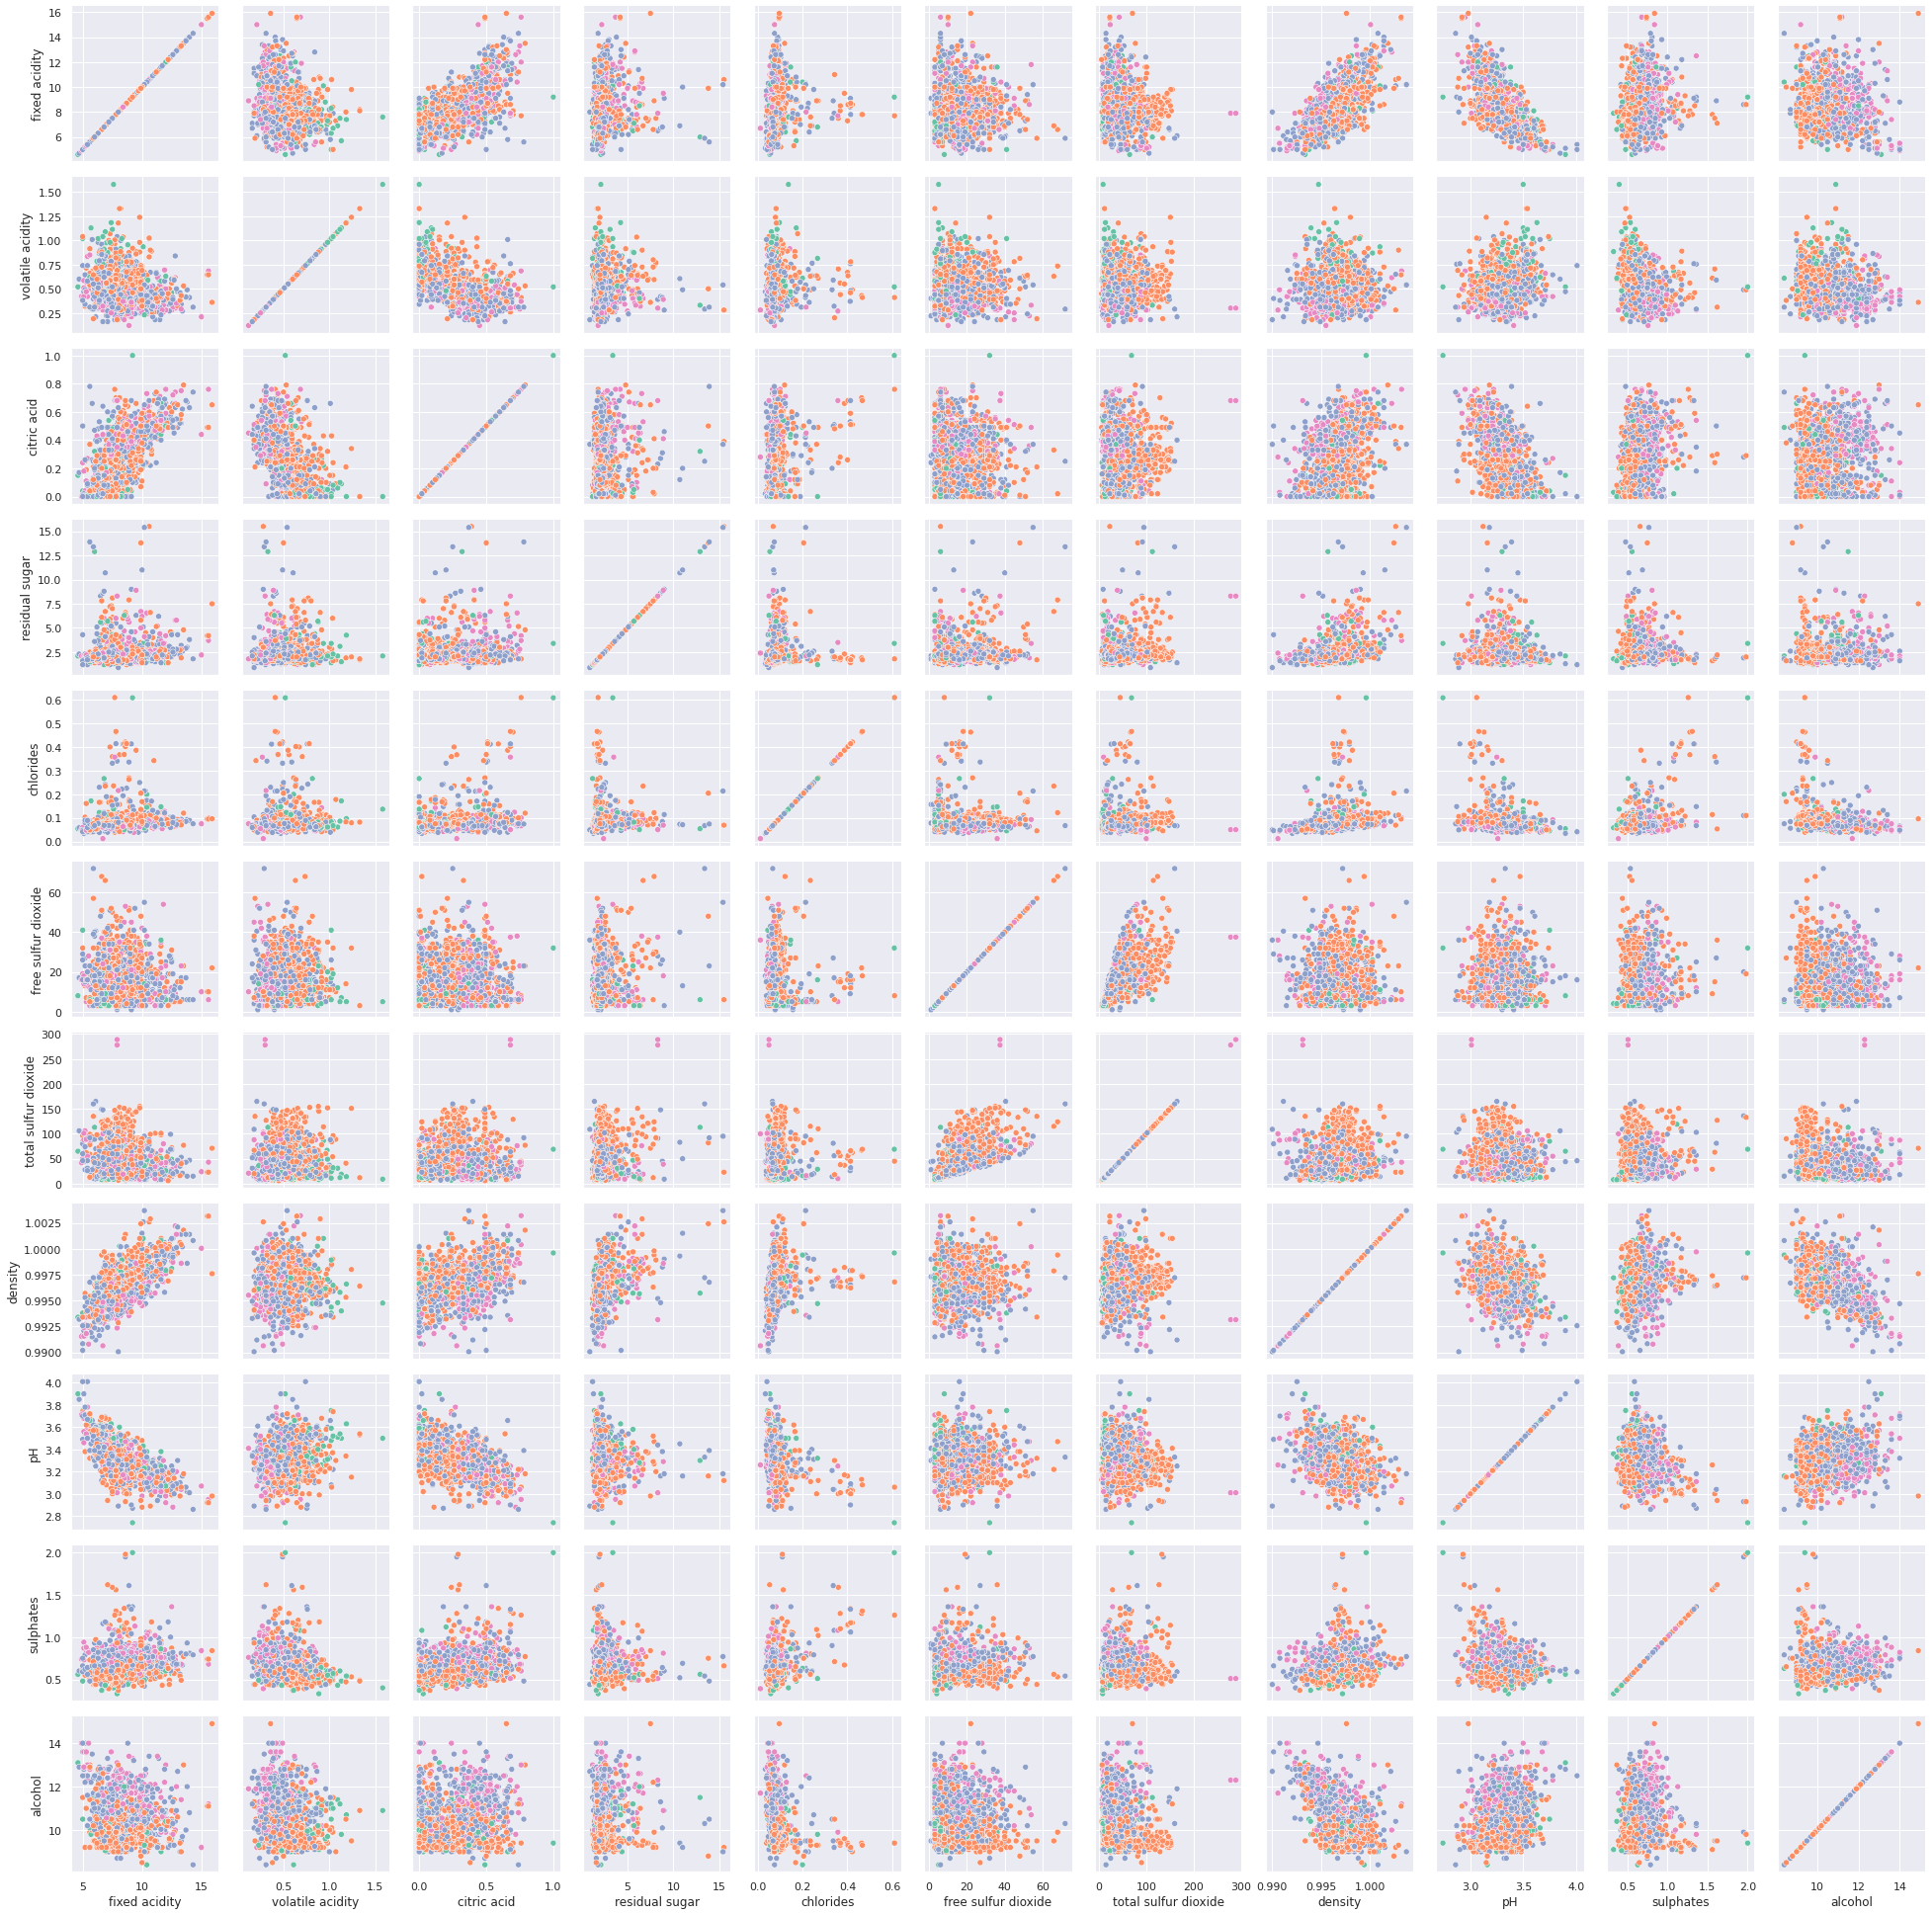

In [ ]:
g = sns.PairGrid(df, hue='quality', palette="Set2")
g.map(sns.scatterplot)

### ניתן לראות שיש קשר הפוך בין החומציות pH וצפיפות היין

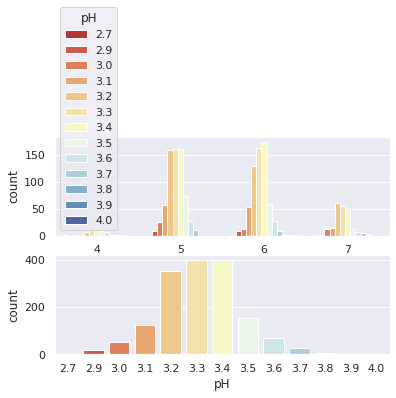

In [ ]:
df_copy = df.copy()
df_copy['pH'] = np.round(df_copy['pH'],1)

fig, ax = plt.subplots(2,1)
sns.countplot(x='quality', hue='pH', data=df_copy, palette='RdYlBu', ax=ax[0]);

# pH ניתן לראות שהרמות
# הכי שכיחות הן בין 3.2 ו3.4 בכל האיכויות.
# כדאי לאמת אם זה המצב הכללי בכך שנבדוק על כל המאגר

sns.countplot(x='pH', data=df_copy, palette='RdYlBu', ax=ax[1]);

# ניתן לראות שההשערה נכונה
del df_copy

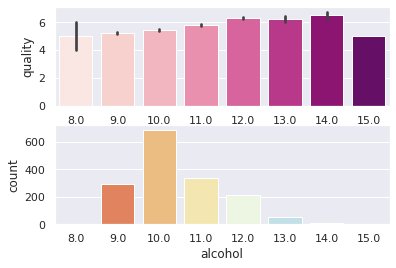

In [ ]:
df_copy = df.copy()
df_copy['alcohol'] = np.round(df_copy['alcohol'])

fig, ax =plt.subplots(2,1)

sns.barplot(x='alcohol', y='quality', data=df_copy, palette='RdPu', ax=ax[0]);

# ניתן לראות שהטועמים העדיפו יין עם יותר אחוזי אלכוהול, והמקסימום ב14%
sns.countplot(x='alcohol', data=df_copy, palette='RdYlBu', ax=ax[1]);

# בעצם יש הרבה פחות יינות עם 14% אלכוהול מכל השאר
del df_copy

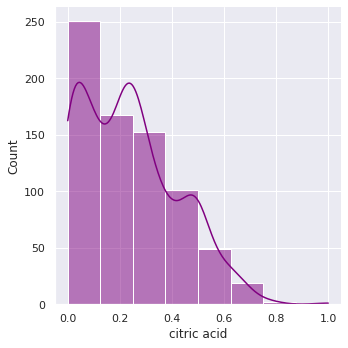

In [ ]:
df_copy = df.copy()
df_copy = df_copy[df_copy['quality'] < 6]

sns.displot(df_copy['citric acid'], kde=True, color='purple', bins=8);
# אנחנו יודעים שחומצה ציטרית יכולה להוסיף רעננות וטעם ביינות, וכשאנו מסתכלים על יינות פחות איכותיים ניתן לראות שככל שיש יותר חומצה צטרית, יש פחות יינות.
# יתכן שזה אומר שבמאגר יש פחות יינות עם חומצה צטרית גבוהה. יתכן גם שהחומצה הצטרית גבוהה רק ביינות איכותיים יותר.

del df_copy

<div dir=auto>
אנחנו יודעים שחומצה ציטרית יכולה להוסיף רעננות וטעם ביינות, וכשאנו מסתכלים על יינות פחות איכותיים ניתן לראות שככל שיש יותר חומצה צטרית, יש פחות יינות.
יתכן שזה אומר שבמאגר יש פחות יינות עם חומצה צטרית גבוהה. יתכן גם שהחומצה הצטרית גבוהה רק ביינות איכותיים יותר.

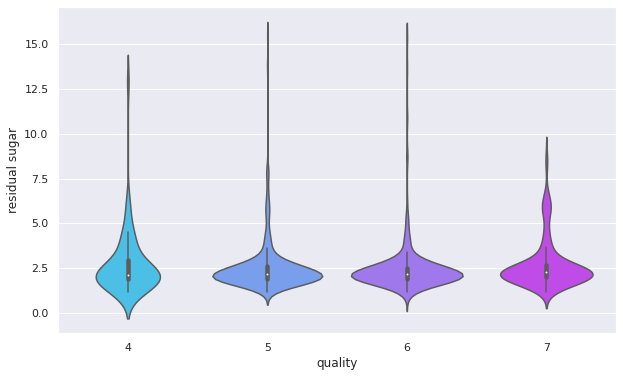

In [ ]:
df_copy = df.copy()
df_copy['residual sugar'] = np.round(df_copy['residual sugar'],1)

plt.figure(figsize = (10,6))
sns.violinplot(x='quality', y='residual sugar', data=df_copy, palette='cool');

del df_copy

<div dir=auto>
בגרף זה אנו יכולים לראות את ערכי הקיצון החציונים,ייחוס של גובה הקופסה, טווח ערכים סביר.

רוחב הכינורות מציג את השכיחות היחסית ולכן ניתן לראות כי כל כינור הוא שונה.

:מגרף זה ניתן להסיק
* ברמה מספר 6 יש את כל רמות הסוכר והטווח שלו הוא הכי גדול
* ברמה מספר 7 יש מעט מעוד יינות עם רמת סוכר גבוהה
* רמת הסוכר הכי גבוהה נמצאת באיכות #5
* היין עם הכי מעט סוכר נמצא ברמה 4 עפ ערכי הקיצון


## Correlation

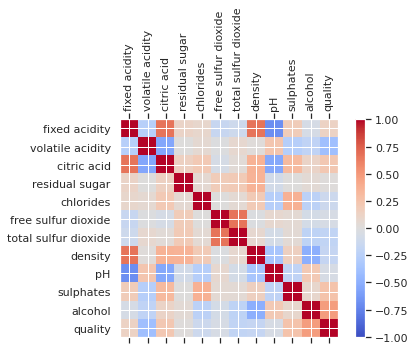

In [ ]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [ ]:
df.corr()[['quality']].sort_values('quality', ascending=False)

quality
quality               1.000000
alcohol               0.476713
sulphates             0.251999
citric acid           0.226040
fixed acidity         0.129255
residual sugar        0.014670
pH                   -0.052235
free sulfur dioxide  -0.053714
chlorides            -0.124232
density              -0.169835
total sulfur dioxide -0.195236
volatile acidity     -0.388004

### Find Max and Min correlations

In [ ]:
cor = corr.iloc[:,:].to_dict()
pairs = []
res = {}
for key, val in cor.items():
  for key2, val2 in val.items():
    if key == key2 or 'quality' in (key, key2): continue
    if (key, key2) in pairs: continue
    pairs.append((key2, key))
    res[(key, key2)] = val2

maxs, mins = [],[]

res2 = res.copy()
for i in range(len(pairs)//5):
  max_vals_key = max(res2, key=res2.get)
  maxs.append((max_vals_key, res2[max_vals_key]))
  res2.pop(max_vals_key)

res2 = res.copy()
for i in range(len(pairs)//5):
  min_vals_key = min(res2, key=res2.get)
  mins.append((min_vals_key, res2[min_vals_key]))
  res2.pop(min_vals_key)

print('maxs:')
for i in maxs:
  print(' ', i)
print('mins:')
for i in mins:
  print(' ', i)

maxs:
  (('fixed acidity', 'citric acid'), 0.6717034347641064)
  (('fixed acidity', 'density'), 0.6680472921189573)
  (('free sulfur dioxide', 'total sulfur dioxide'), 0.667666450481023)
  (('chlorides', 'sulphates'), 0.37126048128542677)
  (('citric acid', 'density'), 0.36494717521123443)
  (('residual sugar', 'density'), 0.35528337098334967)
  (('citric acid', 'sulphates'), 0.3127700438544169)
  (('volatile acidity', 'pH'), 0.23493729440739305)
  (('pH', 'alcohol'), 0.2056325085054961)
  (('citric acid', 'chlorides'), 0.2038229138290422)
  (('residual sugar', 'total sulfur dioxide'), 0.20302788169710137)
mins:
  (('fixed acidity', 'pH'), -0.6829781945685302)
  (('volatile acidity', 'citric acid'), -0.5524956845595799)
  (('citric acid', 'pH'), -0.5419041447395107)
  (('density', 'alcohol'), -0.4961797702417342)
  (('density', 'pH'), -0.34169933478501163)
  (('chlorides', 'pH'), -0.2650261311732267)
  (('volatile acidity', 'sulphates'), -0.26098668528328917)
  (('fixed acidity', 'vola

### Display plots for the most and least correlated columns, colored by column names

In [ ]:
colors = ['lightblue','tan','yellow','orange','red','teal','black','violet','cyan','lightpink','darkblue','olive']
def find_color(i): return colors[list(df.columns).index(i)]

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


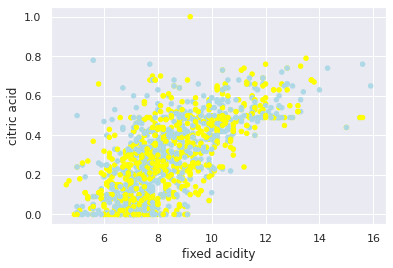

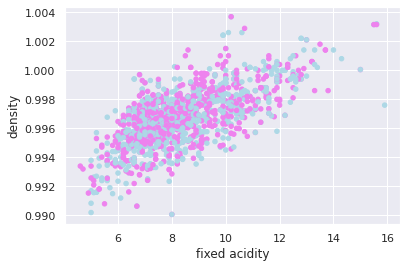

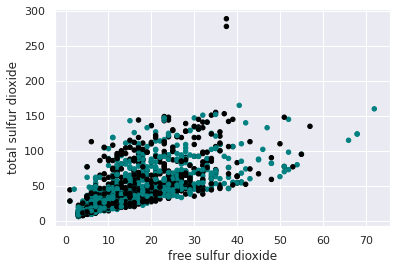

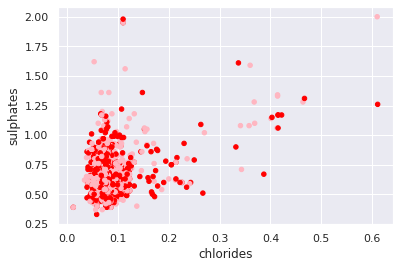

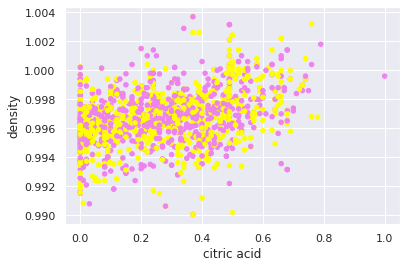

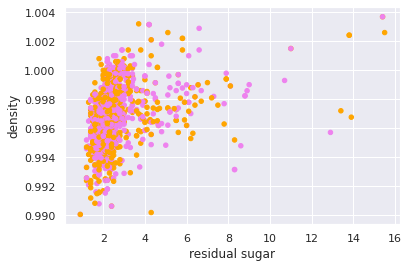

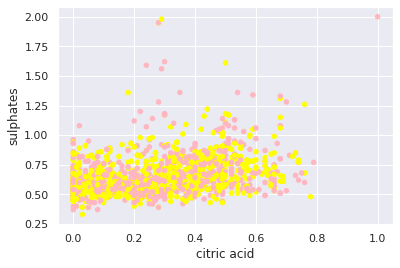

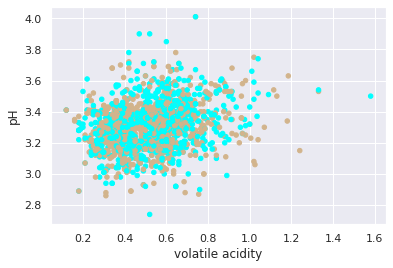

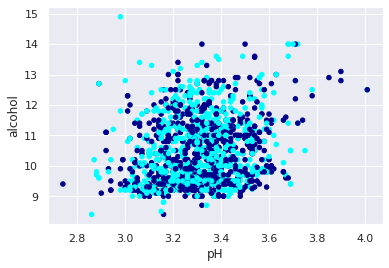

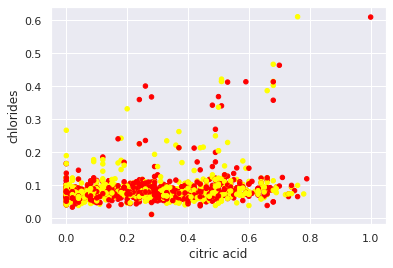

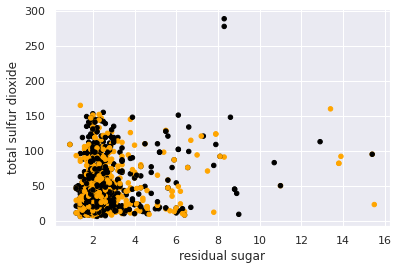

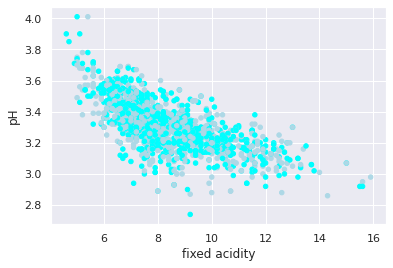

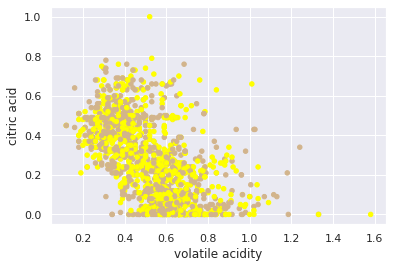

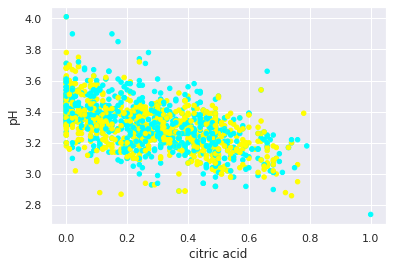

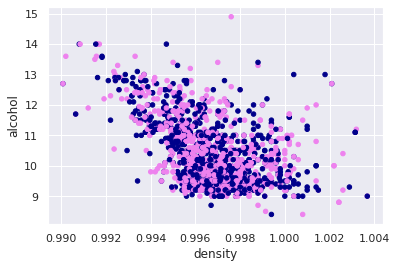

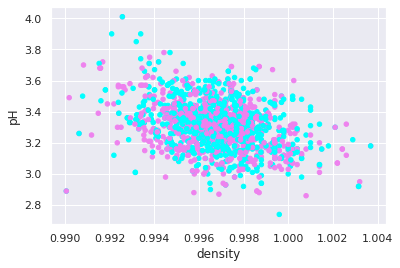

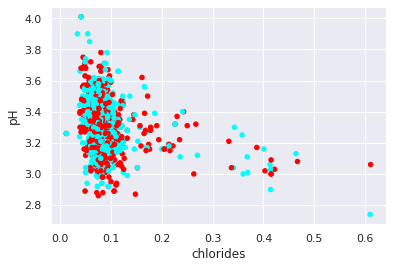

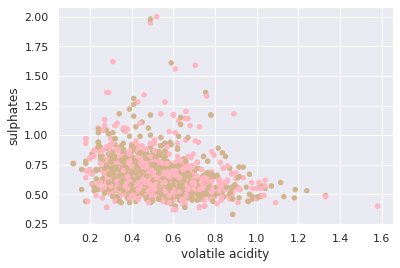

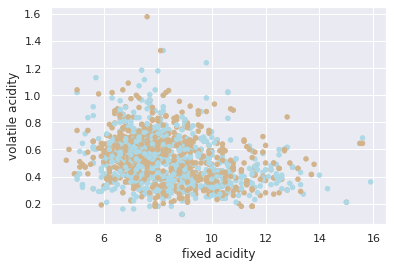

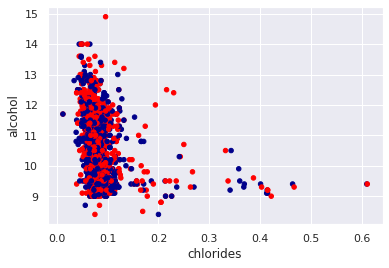

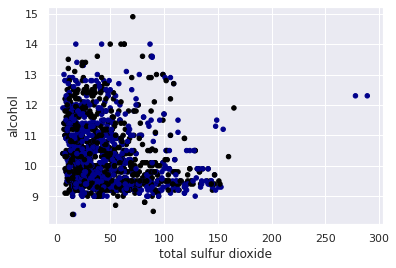

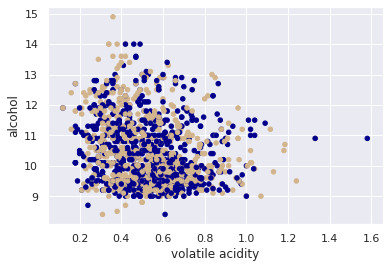

In [ ]:
for i in maxs+mins:
  col1, col2 = i[0]
  c1 = find_color(col1)
  c2 = find_color(col2)
  this_colors = [c1, c2]*799+[c1]

  df.plot.scatter(x=col1, y=col2, c=this_colors)

### Display bar plots between quality and the other columns

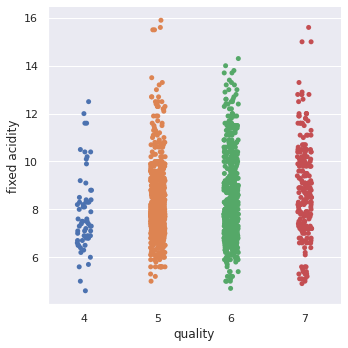

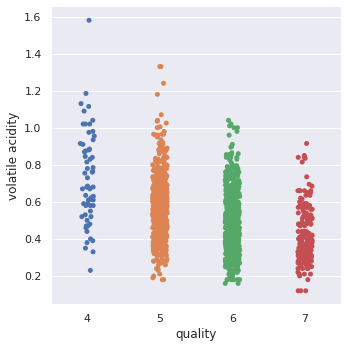

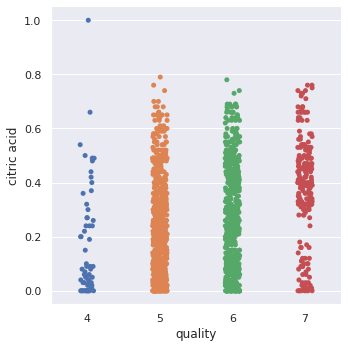

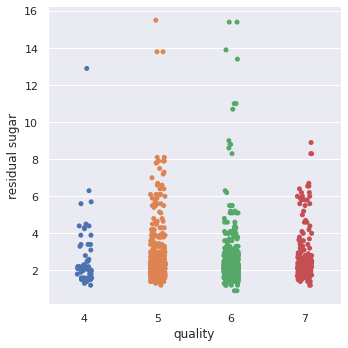

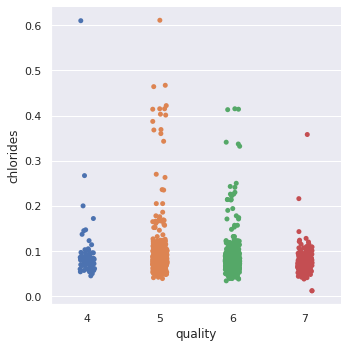

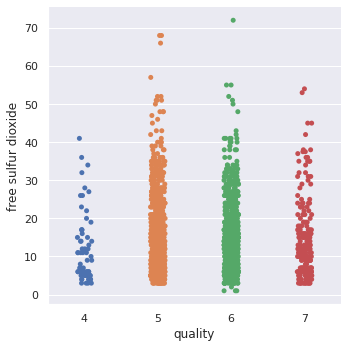

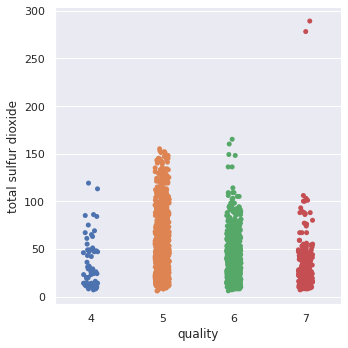

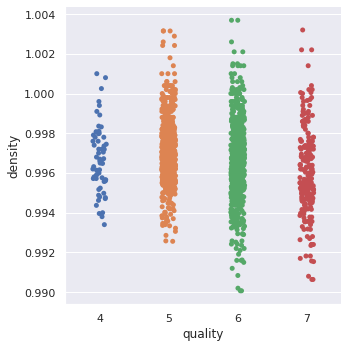

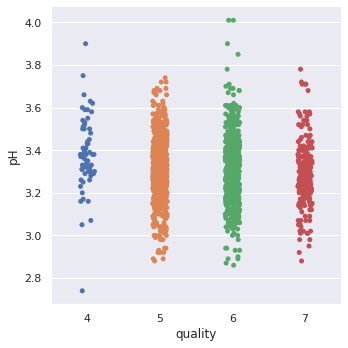

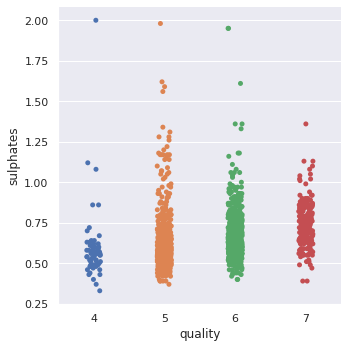

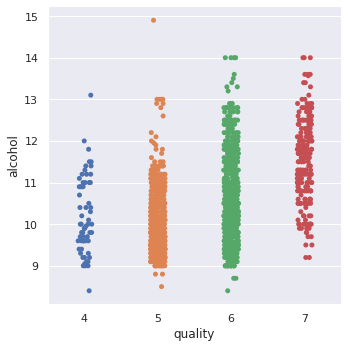

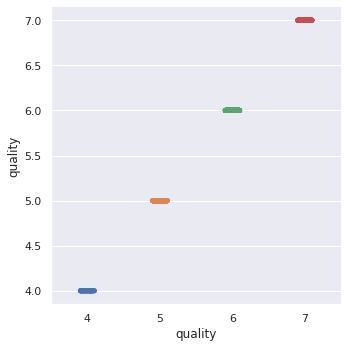

In [ ]:
for col in df.columns:
  ax = sns.catplot(x="quality", y=col, data=df)
  plt.show()

## Predict quality using KNN

In [ ]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
print(X[0:4])

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  


In [ ]:
y = df[['quality']]
y.head()

quality
0        5
1        5
2        5
3        6
4        5

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
# נירמול נתונים

## השיטה מוצאת את הערך הגבוה ביותר והנמוך ביותר במערך, ומחשבת את הטווח שבין שני הערכים
## וגם מחשבת את ההפרש בין כל ערך לבין הערך הנמוך ביותר, ואז מחלקת את ההפרש בטווח. התוצאה היא נרמול של הערכים כדי שימצאו בטווח שבין 1- ל-1


# print(X[0:4])
# print('\n-----------------------')
# print('After normalization:\n')
# print(X[0:4])

In [ ]:
# Train/Test split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
X_test = preprocessing.MinMaxScaler().fit_transform(X_test)
X_train = preprocessing.MinMaxScaler().fit_transform(X_train)
print(X_train.shape," ", y_train.shape)
print(X_test.shape," ", y_test.shape)

(1279, 11)   (1279, 1)
(320, 11)   (320, 1)


In [ ]:
## לפני החלוקה מתבצע "ערבול" של השורות

y_test[0:5]

quality
957         6
1371        6
9           5
1230        6
852         5

In [ ]:
knn3=KNeighborsClassifier(n_neighbors=1)#int(input()))
knn3.fit(X_train, y_train)

y_predict=knn3.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:

acc=accuracy_score(y_test, y_predict)
acc

0.584375

In [ ]:
y = np.ravel(y)
knn3=KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
knn3.fit(X_train, y_train)
y_predict=knn3.predict(X_test)
acc=accuracy_score(y_test, y_predict)
acc

0.515625

In [ ]:
for k in range(3,40,2):
    knn1 = KNeighborsClassifier(n_neighbors = k)
    knn1.fit(X_train, y_train)
    print(f"k = {k} score test: {knn1.score(X_test, y_test)}")

k = 3 score test: 0.5125
k = 5 score test: 0.51875
k = 7 score test: 0.515625
k = 9 score test: 0.503125
k = 11 score test: 0.50625
k = 13 score test: 0.51875
k = 15 score test: 0.5125
k = 17 score test: 0.5375
k = 19 score test: 0.521875
k = 21 score test: 0.5125
k = 23 score test: 0.54375
k = 25 score test: 0.546875
k = 27 score test: 0.55
k = 29 score test: 0.528125
k = 31 score test: 0.540625
k = 33 score test: 0.53125
k = 35 score test: 0.525
k = 37 score test: 0.53125
k = 39 score test: 0.525


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


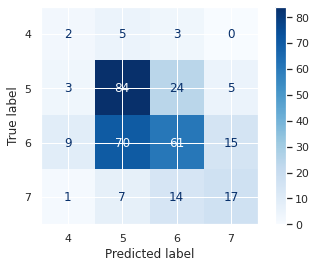

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train, y_train)
knn1.score(X_test, y_test)
plot_confusion_matrix(knn1, X_test, y_test, values_format="d", cmap='Blues');

<div dir=rtl>
ניתן לראות כי יש בלבול בין 6 ל5 ובין 6 ל5 ובלבול קטן יותר בין 7 ל6 ו6 ל7

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/l

              precision    recall  f1-score   support

           4     0.0000    0.0000    0.0000        10
           5     0.5647    0.8276    0.6713       116
           6     0.5800    0.5613    0.5705       155
           7     0.0000    0.0000    0.0000        39

    accuracy                         0.5719       320
   macro avg     0.2862    0.3472    0.3105       320
weighted avg     0.4856    0.5719    0.5197       320



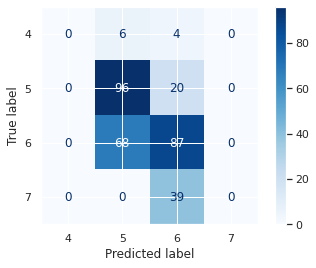

In [ ]:
# SVM : Computing a prediction using SVM algorithm. Checking its performances (mainly accuracy and f1-score)
# ====================================================================================================================
# Runnning the SVM algorithm with the hyper parameter C=1 versus C=100 . Drawing the confusion matrix and the calculating the classification report.

svm1 = SVC(kernel='linear', C=1)
svm1.fit(X_train, y_train)
svm1.score(X_test, y_test)
plot_confusion_matrix(svm1, X_test, y_test, cmap='Blues', values_format="d")

predsvm1 = svm1.predict(X_test)
print (classification_report(y_test, predsvm1, digits=4))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/l

              precision    recall  f1-score   support

           4     0.0000    0.0000    0.0000        10
           5     0.5879    0.8362    0.6904       116
           6     0.6250    0.5484    0.5842       155
           7     0.5789    0.2821    0.3793        39

    accuracy                         0.6031       320
   macro avg     0.4480    0.4167    0.4135       320
weighted avg     0.5864    0.6031    0.5795       320



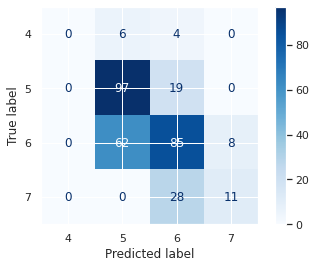

In [ ]:
svm2 = SVC(kernel='linear', C=100)
svm2.fit(X_train, y_train)
svm2.score(X_test, y_test)
plot_confusion_matrix(svm2, X_test, y_test, cmap='Blues', values_format="d")

predsvm2 = svm2.predict(X_test)
print (classification_report(y_test, predsvm2, digits=4))

# Conclusions
# <=====================>
# Prediction of a wine's quality from physiochemical properties can be achieved either with KNN or SVM algorithms.
# KNN performances (accuracy and f1-score) are almost equalto SVM performances - 58% versus 57% but both are great !
# Self reflection
# <===============>
# This course was a substantial opportunity for me to learn and deeply understand principles, ideas, considerations, algorithms and techniques of ML mainly by hands-on experience.
# This course showed me what it means to build a ML model for classification, including the data analysis processes that we need to take.
# In my point of view this project is the most important part of this terrific course.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [ ]:
np.unique(y_train)
y_train = np.subtract(y_train,4)
y_test = np.subtract(y_test,4)
np.unique(y_train)

array([0, 1, 2, 3])

In [ ]:
N=2**10
model = keras.Sequential([
	keras.layers.Dense(N, input_shape=(11,), activation='relu'),
	keras.layers.Dense(N, activation='relu'),
  keras.layers.Dropout(0.4),
	keras.layers.Dense(N, activation='relu'),
  keras.layers.Dropout(0.4),
	keras.layers.Dense(4, activation='sigmoid')])

model.compile(optimizer='adam',
	          loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
	          metrics=['accuracy'])


model.fit(X_train, y_train, batch_size=3, epochs=20)

print("EVALUATION")
model.evaluate(X_test, y_test)


# print("Prediction", np.round(model.predict(np.array([[0,3]]))))

Epoch 1/20
427/427 [==============================] - 2s 4ms/step - loss: 1.9139 - accuracy: 0.4285
Epoch 2/20
427/427 [==============================] - 1s 3ms/step - loss: 1.2199 - accuracy: 0.4504
Epoch 3/20
427/427 [==============================] - 1s 3ms/step - loss: 1.1336 - accuracy: 0.4832
Epoch 4/20
427/427 [==============================] - 1s 3ms/step - loss: 1.0967 - accuracy: 0.4965
Epoch 5/20
427/427 [==============================] - 1s 3ms/step - loss: 1.0635 - accuracy: 0.5074
Epoch 6/20
427/427 [==============================] - 1s 3ms/step - loss: 1.0446 - accuracy: 0.5309
Epoch 7/20
427/427 [==============================] - 1s 3ms/step - loss: 1.0423 - accuracy: 0.5145
Epoch 8/20
427/427 [==============================] - 1s 3ms/step - loss: 1.0313 - accuracy: 0.5324
Epoch 9/20
427/427 [==============================] - 1s 3ms/step - loss: 1.0033 - accuracy: 0.5536
Epoch 10/20
427/427 [==============================] - 1s 3ms/step - loss: 0.9915 - accuracy: 0.5332

[0.8776691555976868, 0.5406249761581421]

In [ ]:
print(y_test)

[6 6 6 4 5 5 5 5 6 7 5 5 5 4 7 6 6 4 6 6 4 6 5 5 5 6 5 6 6 6 6 6 5 6 6 5 5
 5 5 6 5 6 5 5 6 6 6 6 6 6 5 5 6 5 6 6 5 6 6 5 5 5 5 6 6 6 5 6 6 5 6 7 6 6
 6 7 7 6 4 6 6 4 6 7 5 6 5 6 5 7 6 5 5 6 6 6 7 5 5 5 5 5 7 6 6 5 5 6 5 5 6
 6 5 6 6 6 5 5 6 7 6 5 7 6 6 5 6 7 6 6 5 6 5 6 5 5 6 6 6 6 6 6 6 6 5 6 5 5
 6 5 5 6 5 7 6 5 7 4 7 7 5 5 6 6 6 6 6 7 5 5 6 6 5 5 5 7 6 6 5 5 4 5 6 6 5
 5 5 6 6 5 6 5 7 5 6 7 4 5 6 5 5 6 5 7 5 5 5 6 7 4 5 6 5 6 7 6 5 5 5 5 6 5
 6 7 5 5 6 5 7 6 6 5 7 6 6 5 6 6 6 7 5 7 6 6 6 6 6 7 5 5 5 6 7 6 7 6 6 6 6
 5 6 6 5 5 6 5 6 6 6 5 7 6 5 6 6 7 6 6 5 5 6 5 7 6 6 7 6 7 6 5 6 6 6 5 7 7
 6 6 6 6 6 6 6 5 5 6 5 7 6 5 6 5 5 6 6 5 6 6 6 6]
